# Data Preparation and Exploration

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
# Reading the CSV file into a DataFrame
heartcsv = pd.read_csv('C:/Users/leona/Desktop/SmartDevices/heart_disease/heart.csv')

In [3]:
# Displaying information about the DataFrame
heartcsv.describe()
heartcsv.info()
heartcsv.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Data Preprocessing

In [4]:
# Extracting target variable and encoding categorical features
y = heartcsv['HeartDisease']
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
heartcsvVal = pd.get_dummies(heartcsv, prefix=categorical_cols, dtype=float)

disease_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
                    'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
                    'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y',
                    'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']
X = heartcsvVal[disease_features]

# Exploratory Data Analysis

Text(0.5, 1.05, 'Correlation between the features')

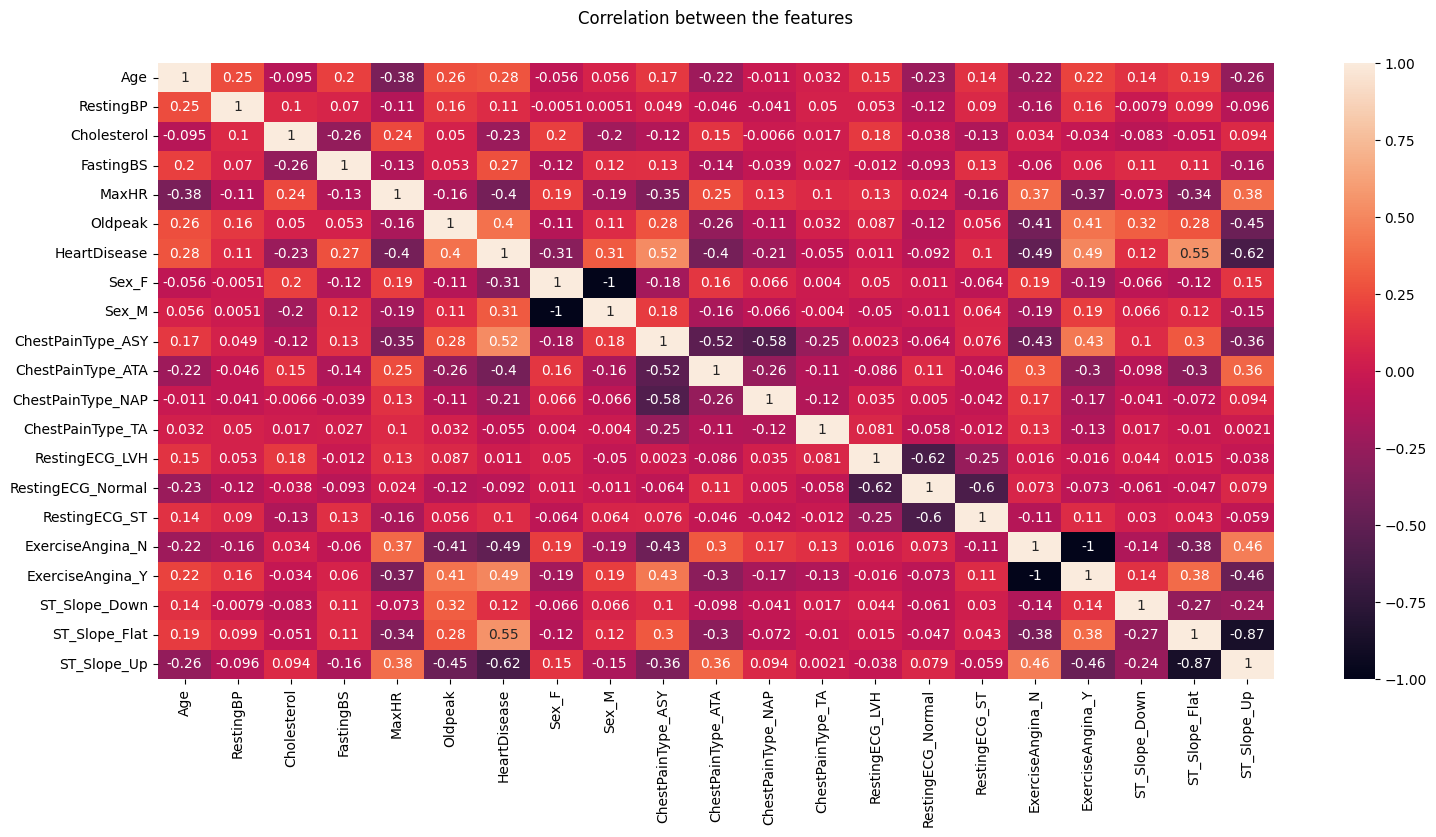

In [6]:
# Visualizing correlation among features
correlation = heartcsvVal.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(data=correlation, annot=True)
plt.title('Correlation between the features', y=1.05)

# Model Building and Evaluation (One-Hot Encoding)

In [7]:
# Splitting data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
# Decision Tree Classifier
heart_disease_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.10, random_state=1)
heart_disease_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.1, random_state=1)

In [9]:
# Evaluation metrics
predicted_heart_disease = heart_disease_model.predict(val_X)
accuracy_score(val_y, predicted_heart_disease)

0.8858695652173914

In [10]:
# Hyperparameter tuning using Grid Search
params_dt = {'max_depth': [1, 3, 4, 5, 6], 'min_samples_leaf': [0.04, 0.06, 0.08, 0.10, 0.16], 'max_features': [0.2, 0.4, 0.6, 0.8]}
grid_df = GridSearchCV(estimator=heart_disease_model, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=1)
grid_df.fit(train_X, train_y)
best_hyperparams = grid_df.best_params_
best_CV_score = grid_df.best_score_
best_CV_score

#It is not helping, the obtained accuracy is lower than the actual parameters

0.8405960755275824

In [11]:
# Bagging Classifier
bc_heart_disease = BaggingClassifier(estimator=heart_disease_model, n_estimators=300, n_jobs=3)
bc_heart_disease.fit(train_X, train_y)
bc_predicted_heart_disease = bc_heart_disease.predict(val_X)
bc = accuracy_score(val_y, bc_predicted_heart_disease)
bc

0.8858695652173914

In [12]:
# AdaBoost Classifier
adb_heart_disease = AdaBoostClassifier(estimator=heart_disease_model, n_estimators=100)
adb_heart_disease.fit(train_X, train_y)
adb_heart_disease_proba = adb_heart_disease.predict_proba(val_X)[:, 1]
roc_auc_score(val_y, adb_heart_disease_proba)

0.9433660933660933

# Model Building and Evaluation (Label Encoding)

In [13]:
# Using LabelEncoder instead of OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [14]:
# Encoding categorical columns using LabelEncoder
K = heartcsv.copy()
le = LabelEncoder()

columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

for col in categorical_cols:
    K[col] = le.fit_transform(K[col])
K = K[columns]

In [15]:
# Splitting data into training and validation sets
train_K, val_K, train_y, val_y = train_test_split(K, y, random_state=1, test_size=0.2)

In [16]:
# Decision Tree Classifier
heart_disease_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.10, random_state=1)
heart_disease_model.fit(train_K, train_y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=0.1, random_state=1)

In [17]:
# Evaluation metrics
predicted_heart_disease = heart_disease_model.predict(val_K)
accuracy_score(val_y, predicted_heart_disease)

0.8858695652173914

In [18]:
# AdaBoost Classifier
adb_heart_disease = AdaBoostClassifier(estimator=heart_disease_model, n_estimators=100)
adb_heart_disease.fit(train_K, train_y)
adb_heart_disease_proba = adb_heart_disease.predict_proba(val_K)[:, 1]
roc_auc_score(val_y, adb_heart_disease_proba)

0.937100737100737

# Conclusion

Based on the results, the methods RandomForestClassifier + Adaboosting and One-Hot Coding as Data-Preprocessing achivied the best result which is 94.33% accuracy in discerning the presence or absence of heart disease among individuals.